# CS7DS1-A : Data Analytics Semester Project

### TCD Student ID: 18303317 | Name: Mohd Tousif | Course: MSc. Computer Science(Data Science)

#### A. Import Numpy, Pandas, Sklearn

In [118]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.plotting import scatter_matrix
%matplotlib inline

#### B. Read dataset into pandas dataframe

In [101]:
dataset = pd.read_csv('~/Downloads/Project_Data.csv', sep=',')

#### C. Print dataset

In [102]:
dataset.head()

,ID,Response,Group,X1,X2,X3,X4,X5,X6,X7,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,1,0,0,460.0,460.0,460.0,50.21,9.15,2.3,273.6,1.0,1.0,1.0,0,0.0,1.0,0.0
1,2,0,1,74.0,NaN,NaN,812.50,0.88,4.1,406.6,1.0,NaN,NaN,1,0.0,2.0,0.0
2,3,0,1,58.0,0.0,0.0,87.71,0.39,4.7,946.1,1.0,0.0,0.0,1,0.0,2.0,1.0
3,4,0,0,39.0,NaN,NaN,92.14,26.79,3.1,534.6,1.0,NaN,NaN,1,1.0,1.0,1.0
4,5,0,1,15.0,45.0,60.0,75.24,16.60,3.6,1019.4,0.0,0.0,0.0,1,0.0,2.0,1.0


#### D. Print shape of the data

In [103]:
dataset.shape

(296, 17)

#### E. Impute NaNs with 0

In [104]:
dataset = dataset.fillna(0)
dataset.head()

,ID,Response,Group,X1,X2,X3,X4,X5,X6,X7,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,1,0,0,460.0,460.0,460.0,50.21,9.15,2.3,273.6,1.0,1.0,1.0,0,0.0,1.0,0.0
1,2,0,1,74.0,0.0,0.0,812.50,0.88,4.1,406.6,1.0,0.0,0.0,1,0.0,2.0,0.0
2,3,0,1,58.0,0.0,0.0,87.71,0.39,4.7,946.1,1.0,0.0,0.0,1,0.0,2.0,1.0
3,4,0,0,39.0,0.0,0.0,92.14,26.79,3.1,534.6,1.0,0.0,0.0,1,1.0,1.0,1.0
4,5,0,1,15.0,45.0,60.0,75.24,16.60,3.6,1019.4,0.0,0.0,0.0,1,0.0,2.0,1.0


#### F. Describe dataset after imputation

In [105]:
dataset.describe()

,ID,Response,Group,X1,X2,X3,X4,X5,X6,X7,Y1,Y2,Y3,Y4,Y5,Y6,Y7
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,0.479730,0.675676,297.22973,1631.175676,2795.766892,233.334797,34.839291,3.019932,1243.415541,0.503378,0.206081,0.256757,0.513514,0.456081,1.195946,0.540541
std,85.592056,0.500435,0.468915,955.26773,7099.362019,12450.921804,644.438316,33.342699,1.912663,1710.149123,0.500835,0.405174,0.437584,0.500664,0.498911,0.782510,0.499198
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,21.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.750000,0.000000,0.000000,15.00000,0.000000,0.000000,50.607500,8.887500,2.400000,299.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,148.500000,0.000000,1.000000,35.50000,0.000000,0.000000,71.825000,19.005000,3.350000,594.700000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,222.250000,1.000000,1.000000,179.75000,171.000000,260.000000,132.375000,61.070000,4.000000,1383.325000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,296.000000,1.000000,1.000000,9743.00000,80919.000000,143856.000000,6864.000000,99.800000,9.700000,8491.100000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


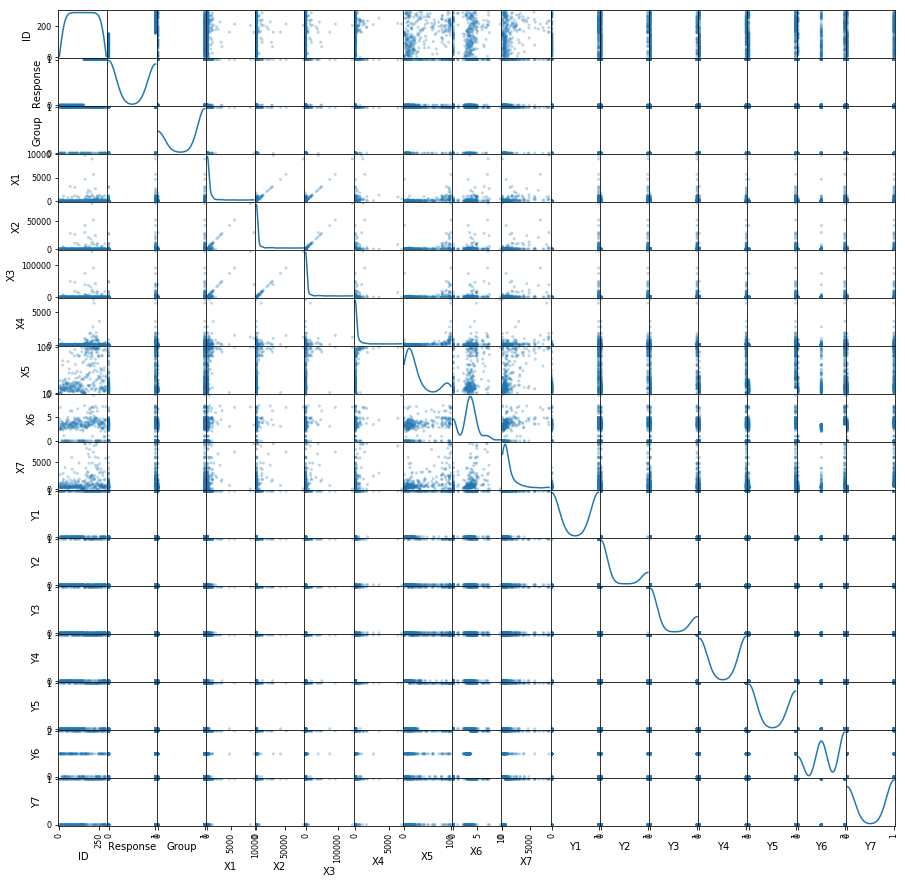

In [106]:
mat = scatter_matrix(dataset, alpha=0.3, figsize=(15, 15), diagonal='kde')

#### G. Seperating the target variable and features

In [107]:
X = dataset.values[:, 2:17]
Y = dataset.values[:, 1]
print("\nPredictors: \n",X)
print("\nTarget Variable: \n", Y)


Predictors: 
 [[  0. 460. 460. ...   0.   1.   0.]
 [  1.  74.   0. ...   0.   2.   0.]
 [  1.  58.   0. ...   0.   2.   1.]
 ...
 [  0. 249. 747. ...   1.   1.   0.]
 [  1. 139.   0. ...   1.   0.   0.]
 [  0.  31.  31. ...   0.   1.   0.]]

Target Variable: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 

#### H. Spliting the dataset into train and test 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

# Decision Tree Classifiers

#### I. Building Decision tree classifiers using Entropy and Gini

In [109]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
classifier_entropy = clf_entropy.fit(X_train, y_train)

# Decision tree using gini index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)
classifier_gini = clf_gini.fit(X_train, y_train)

#### J. Predictons using Entropy


Confusion Matrix:


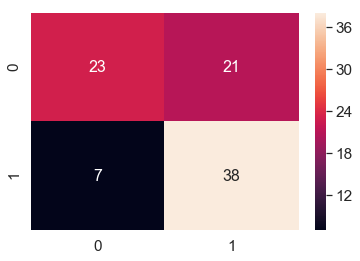

In [131]:
y_pred_entropy = classifier_entropy.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred_entropy)
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
sn.set(font_scale=1.4)
heatmap = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [132]:
# Accuracy
print("\nAccuracy:", accuracy_score(y_test,y_pred_entropy)*100)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy))


Accuracy: 68.53932584269663

Classification Report:
             precision    recall  f1-score   support

        0.0       0.77      0.52      0.62        44
        1.0       0.64      0.84      0.73        45

avg / total       0.70      0.69      0.68        89



#### K. Predictons using Gini


Confusion Matrix:


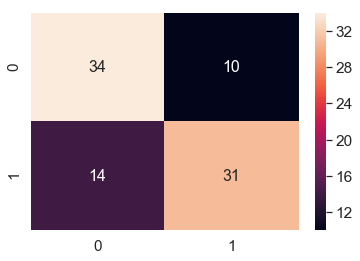

In [123]:
y_pred_gini = classifier_gini.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred_gini)
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
sn.set(font_scale=1.4)
heatmap = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [133]:
# Accuracy
print("\nAccuracy:", accuracy_score(y_test,y_pred_gini)*100)

# Classification Report
print("\nClassification Report")
print(classification_report(y_test, y_pred_gini))


Accuracy: 73.03370786516854

Classification Report
             precision    recall  f1-score   support

        0.0       0.71      0.77      0.74        44
        1.0       0.76      0.69      0.72        45

avg / total       0.73      0.73      0.73        89



# Logistic Regression Classifier with L1 penalty

#### L. Build and Train a Logistic Regression Classifier

In [112]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', multi_class='ovr')
clf.fit(X_train, y_train)

#### M. Predictions using Logistic Classifier


Confusion Matrix:


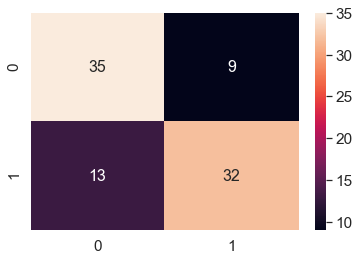

In [127]:
y_pred_logit = clf.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred_logit)
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
sn.set(font_scale=1.4)
heatmap = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [134]:
# Accuracy
print("\nAccuracy:", accuracy_score(y_test,y_pred_logit)*100)

# Classification Report
print("\nClassification Report")
print(classification_report(y_test, y_pred_logit))


Accuracy: 75.28089887640449

Classification Report
             precision    recall  f1-score   support

        0.0       0.73      0.80      0.76        44
        1.0       0.78      0.71      0.74        45

avg / total       0.76      0.75      0.75        89



# Random Forest Classifier with n_estimators=100 

#### N. Build and Train a Random Forest Classifier

In [114]:
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
random_forest_clf.fit(X_train, y_train)
y_pred_random_forest = random_forest_clf.predict(X_test)

#### O. Predictions using Random Forest Classifier


Confusion Matrix:


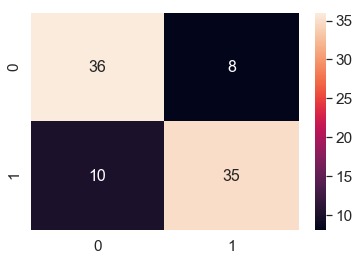

In [129]:
# Confusion Matrix
print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred_random_forest)
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
sn.set(font_scale=1.4)
heatmap = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [135]:
# Accuracy
print("\nAccuracy:", accuracy_score(y_test,y_pred_random_forest)*100)

# Classification Report
print("\nClassification Report")
print(classification_report(y_test, y_pred_random_forest))


Accuracy: 79.7752808988764

Classification Report
             precision    recall  f1-score   support

        0.0       0.78      0.82      0.80        44
        1.0       0.81      0.78      0.80        45

avg / total       0.80      0.80      0.80        89

